In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from pydataset import data

### 1. Clustering with the Iris Dataset. Using this lesson as a guide, perform clustering on the iris dataset.

In [18]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [19]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### a. Choose features other than the ones used in the lesson.

In [20]:
x = df[['sepal_length','sepal_width']]
x.head()

,sepal_length,sepal_width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6


In [21]:
# Modeling
# Create and Fit cluster model

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

clusters = kmeans.predict(x)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [22]:
# Add cluster to our original data
df['two_features_cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,two_features_cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [8]:
# Visualize Clusters
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.76
virginica,6.588,2.974,5.552,2.026,1.30


### b. Visualize the results of your clustering.

[Text(0.5, 1.0, 'K-Means Clusters')]

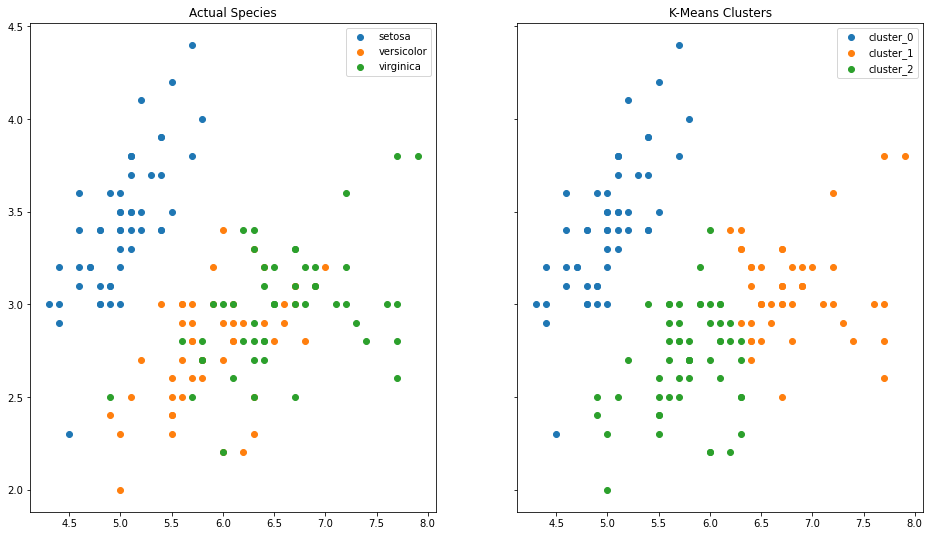

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.sepal_length, subset.sepal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].sepal_length, df[df.cluster == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

### c. Use the elbow method to visually select a good value for k.

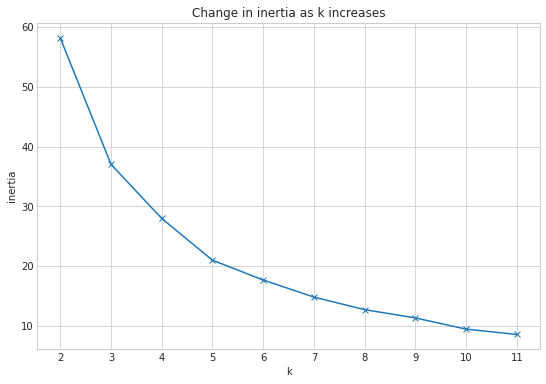

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

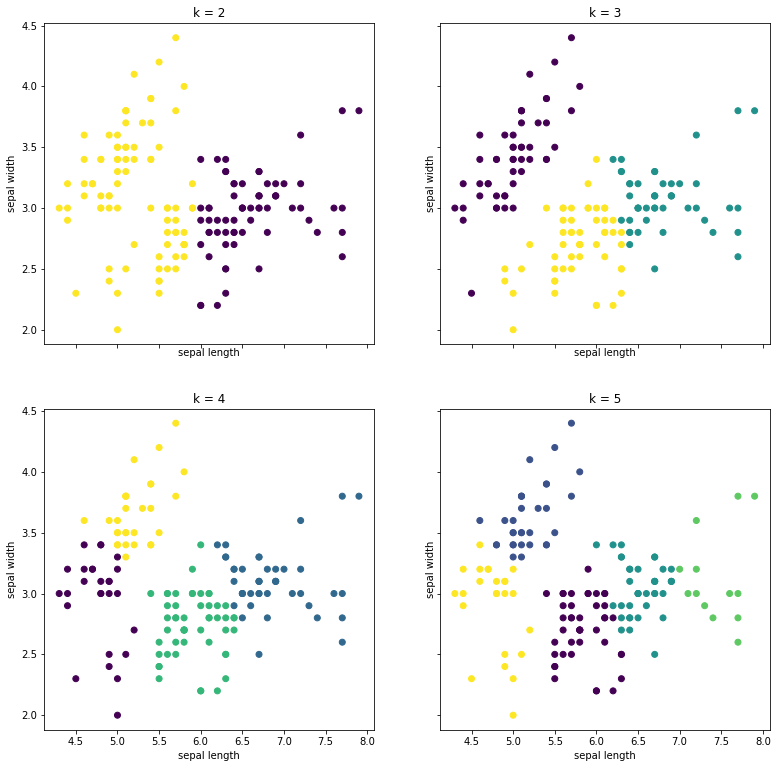

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(x).predict(x)
    ax.scatter(x.sepal_length, x.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

### d. Repeat the clustering, this time with 3 different features.

In [15]:
# it seems sepal length have better prediction than width
# so I will use sepal_length, petal_length and petal_width

x1 = df[['petal_length','petal_width', 'sepal_length']]
x1.head()

,sepal_length,petal_length,petal_width
1,5.1,1.4,0.2
2,4.9,1.4,0.2
3,4.7,1.3,0.2
4,4.6,1.5,0.2
5,5.0,1.4,0.2


In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x1)

clusters1 = kmeans.predict(x1)
clusters1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [24]:
df['three_features_cluster'] = clusters1
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,two_features_cluster,three_features_cluster
1,5.1,3.5,1.4,0.2,setosa,0,1
2,4.9,3.0,1.4,0.2,setosa,0,1
3,4.7,3.2,1.3,0.2,setosa,0,1
4,4.6,3.1,1.5,0.2,setosa,0,1
5,5.0,3.6,1.4,0.2,setosa,0,1


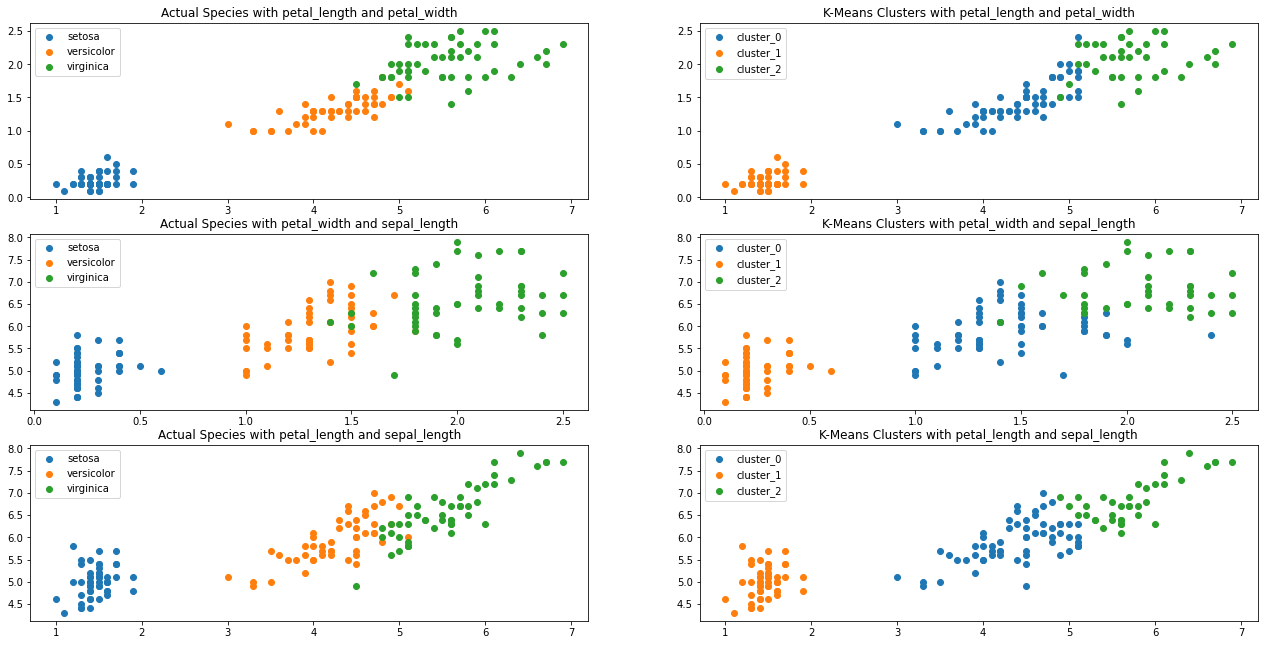

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(22, 11))

for species, subset in df.groupby('species'):
    axs[0,0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0,0].legend()
axs[0,0].set(title='Actual Species with petal_length and petal_width')
    
for cluster_n in df.three_features_cluster.sort_values().unique():
    axs[0,1].scatter(df[df.three_features_cluster == cluster_n].petal_length, df[df.three_features_cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[0,1].legend()
axs[0,1].set(title="K-Means Clusters with petal_length and petal_width")

for species, subset in df.groupby('species'):
    axs[1,0].scatter(subset.petal_width, subset.sepal_length, label=species)
    
axs[1,0].legend()
axs[1,0].set(title='Actual Species with petal_width and sepal_length')

for cluster_n in df.three_features_cluster.sort_values().unique():
    axs[1,1].scatter(df[df.three_features_cluster == cluster_n].petal_width, df[df.three_features_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[1,1].legend()
axs[1,1].set(title="K-Means Clusters with petal_width and sepal_length")

for species, subset in df.groupby('species'):
    axs[2,0].scatter(subset.petal_length, subset.sepal_length, label=species)
    
axs[2,0].legend()
axs[2,0].set(title='Actual Species with petal_length and sepal_length')

for cluster_n in df.three_features_cluster.sort_values().unique():
    axs[2,1].scatter(df[df.three_features_cluster == cluster_n].petal_length, df[df.three_features_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[2,1].legend()
axs[2,1].set(title="K-Means Clusters with petal_length and sepal_length")

plt.show()

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [49]:
import wrangle_mall_exercise
mall = wrangle_mall_exercise.get_mall_data()
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
mall = wrangle_mall_exercise.get_dummy(mall)
mall.head()

,customer_id,age,annual_income,spending_score,Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [51]:
mall = mall.drop(columns='customer_id')

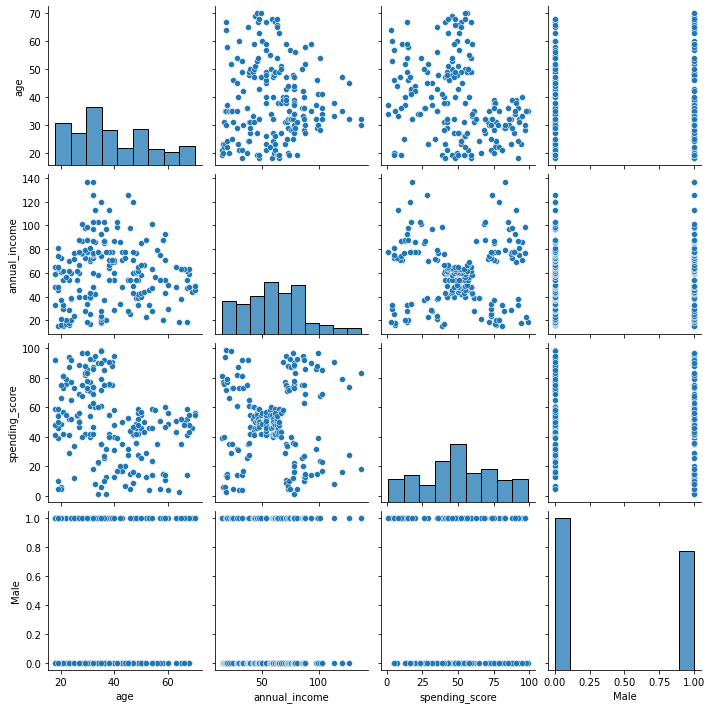

In [34]:
sns.pairplot(mall)

In [35]:
y = mall[['spending_score','age']]
y.head()

,spending_score,age
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31


In [36]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(y)

clusters = kmeans.predict(y)
clusters

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [37]:
mall['two_features_cluster'] = clusters
mall.head()

,age,annual_income,spending_score,Male,two_features_cluster
0,19,15,39,1,0
1,21,15,81,1,1
2,20,16,6,0,0
3,23,16,77,0,1
4,31,17,40,0,0


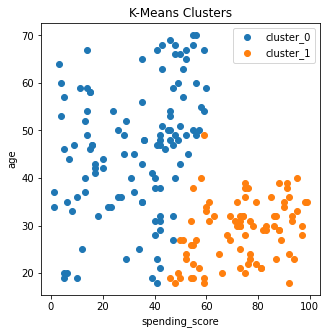

In [40]:
plt.figure(figsize=(5, 5))

for cluster_n in mall.two_features_cluster.sort_values().unique():
    plt.scatter(mall[mall.two_features_cluster == cluster_n].spending_score, mall[mall.two_features_cluster == cluster_n].age, label=f'cluster_{cluster_n}')

plt.legend()
plt.xlabel('spending_score')
plt.ylabel('age')
plt.title("K-Means Clusters")
plt.show()

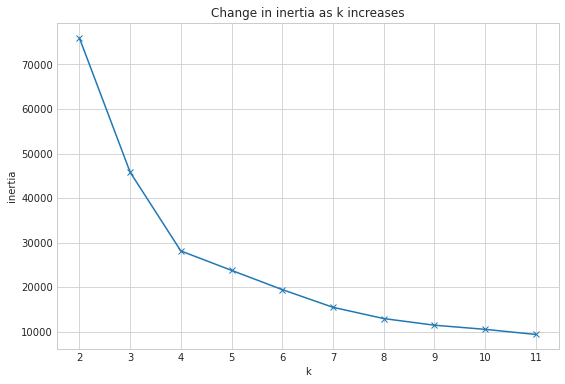

In [41]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(y).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

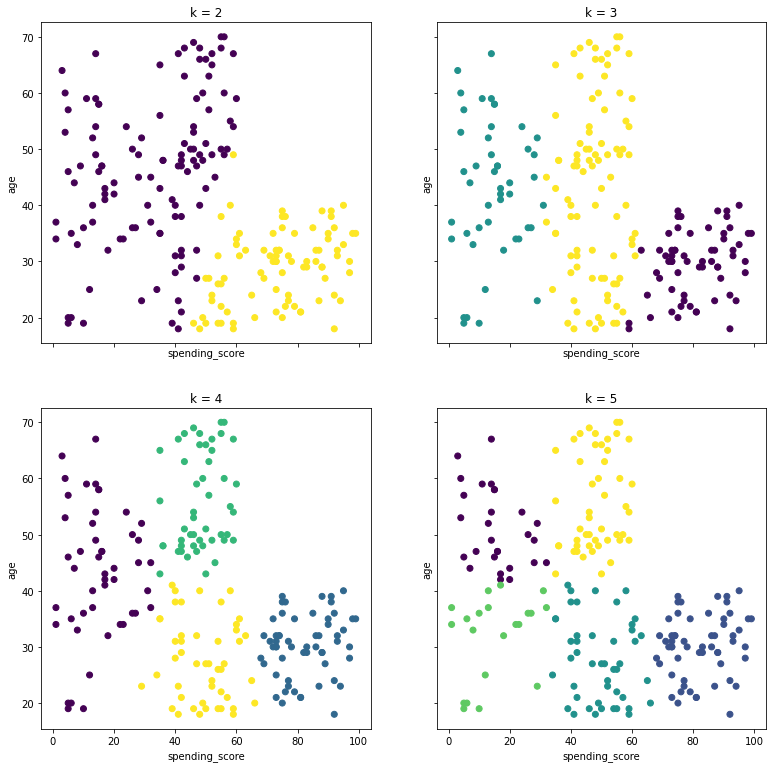

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(y).predict(y)
    ax.scatter(y.spending_score, y.age, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='spending_score', ylabel='age')

In [ ]:
# k = 4 is the best choice

### 3. How does scaling impact the results of clustering? Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

* mall data set

In [45]:
mall.head()

,age,annual_income,spending_score,Male,two_features_cluster
0,19,15,39,1,0
1,21,15,81,1,1
2,20,16,6,0,0
3,23,16,77,0,1
4,31,17,40,0,0


In [56]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(mall[['age','annual_income','spending_score']])
mall[['age','annual_income','spending_score']] = mms.transform(mall[['age','annual_income','spending_score']])  

In [57]:
mall.head()

,age,annual_income,spending_score,Male
0,0.019231,0.000000,0.387755,1
1,0.057692,0.000000,0.816327,1
2,0.038462,0.008197,0.051020,0
3,0.096154,0.008197,0.775510,0
4,0.250000,0.016393,0.397959,0


In [58]:
y_scaled = mall[['spending_score','age']]
y_scaled.head()

,spending_score,age
0,0.387755,0.019231
1,0.816327,0.057692
2,0.051020,0.038462
3,0.775510,0.096154
4,0.397959,0.250000


In [59]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(y_scaled)

clusters = kmeans.predict(y_scaled)
clusters

array([1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       3, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 3, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       1, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [60]:
mall['two_features_cluster_scaled'] = clusters
mall.head()

,age,annual_income,spending_score,Male,two_features_cluster_scaled
0,0.019231,0.000000,0.387755,1,1
1,0.057692,0.000000,0.816327,1,2
2,0.038462,0.008197,0.051020,0,1
3,0.096154,0.008197,0.775510,0,2
4,0.250000,0.016393,0.397959,0,1


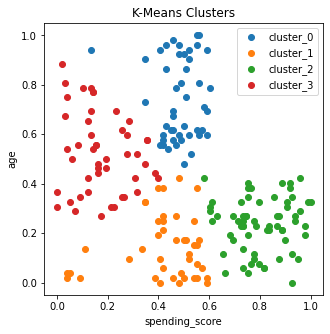

In [61]:
plt.figure(figsize=(5, 5))

for cluster_n in mall.two_features_cluster_scaled.sort_values().unique():
    plt.scatter(mall[mall.two_features_cluster_scaled == cluster_n].spending_score, mall[mall.two_features_cluster_scaled == cluster_n].age, label=f'cluster_{cluster_n}')

plt.legend()
plt.xlabel('spending_score')
plt.ylabel('age')
plt.title("K-Means Clusters")
plt.show()

In [ ]:
# unscaled and scaled clusters are very similar but still have a little difference.

**Bonus**
1. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
2. Visualize the data and guess the number and shape of the clusters.
3. Implement the KMeans algorithm on unscaled data and visualize the clusters.
4. Repeat the step above but with scaled data.
5. Write down the takeaways from this exercise.

In [62]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing'

csv_export_url = sheet_url.replace('/edit?usp=', '/export?format=csv&usp=')
csv_export_url

'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?format=csv&usp=sharing'

In [63]:
df = pd.read_csv(csv_export_url)
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


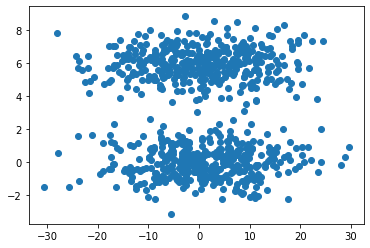

In [64]:
plt.scatter(df.x, df.y)

* 2 clusters

In [84]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

clusters = kmeans.predict(df)
clusters

array([0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 3, 2, 0, 0, 1, 1, 1, 1, 3, 0, 2,
       3, 1, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 0, 0, 0, 1, 1, 0, 1, 3, 2, 1,
       1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0,
       0, 0, 3, 1, 1, 0, 0, 0, 1, 2, 0, 0, 3, 1, 3, 0, 2, 1, 0, 3, 0, 1,
       0, 1, 3, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2,
       0, 0, 1, 1, 3, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 3, 0,
       0, 2, 1, 1, 0, 1, 1, 0, 3, 0, 0, 3, 1, 3, 0, 1, 3, 1, 1, 2, 0, 0,
       2, 0, 2, 1, 3, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 3, 1, 0, 0, 1, 3, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 3, 0, 1, 0, 1, 1, 0, 1, 3, 1,
       0, 0, 2, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 3, 0,
       2, 2, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 3, 3, 1, 1, 2, 2, 1,
       0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 3, 2, 1, 1, 1, 3, 0, 0, 2,

In [85]:
df['cluster'] = clusters
df.head()

,x,y,cluster
0,-3.641747,0.121540,0
1,-7.620447,1.810897,0
2,-6.505373,0.068072,0
3,7.730963,0.585521,1
4,17.283668,0.344804,2


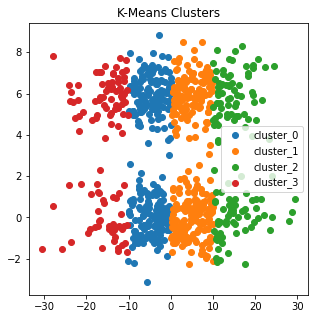

In [86]:
plt.figure(figsize=(5, 5))

for cluster_n in df.cluster.sort_values().unique():
    plt.scatter(df[df.cluster == cluster_n].x, df[df.cluster == cluster_n].y, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

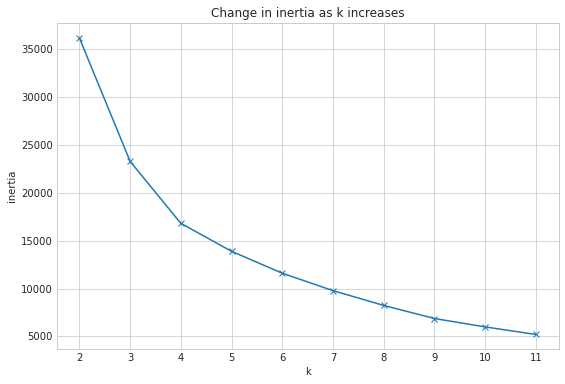

In [87]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(df).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [76]:
# scale the data

scaler = MinMaxScaler()

scaler.fit(df)

df_scaled = scaler.transform(df)

In [77]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled = df_scaled.rename(columns = {0 :'x_scaled',1 :'y_scaled', 2: 'unscaled_cluster'})
df_scaled.head()

,x_scaled,y_scaled,unscaled_cluster
0,0.448379,0.273145,1.0
1,0.382135,0.414353,1.0
2,0.400701,0.268676,1.0
3,0.637730,0.311928,0.0
4,0.796779,0.291807,0.0


In [88]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)

clusters1 = kmeans.predict(df_scaled)
clusters1

array([0, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3,
       0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3,
       3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3,
       0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0,
       3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3,
       0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3,
       0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3,

In [89]:
df_scaled['cluster1'] = clusters1
df_scaled.head()

,x_scaled,y_scaled,unscaled_cluster,cluster1
0,0.448379,0.273145,1.0,0
1,0.382135,0.414353,1.0,0
2,0.400701,0.268676,1.0,0
3,0.637730,0.311928,0.0,3
4,0.796779,0.291807,0.0,3


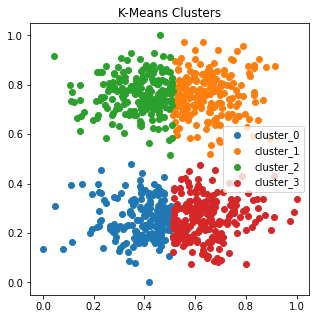

In [90]:
# scaled viz
plt.figure(figsize=(5, 5))

for cluster_n in df_scaled.cluster1.sort_values().unique():
    plt.scatter(df_scaled[df_scaled.cluster1 == cluster_n].x_scaled, df_scaled[df_scaled.cluster1 == cluster_n].y_scaled, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

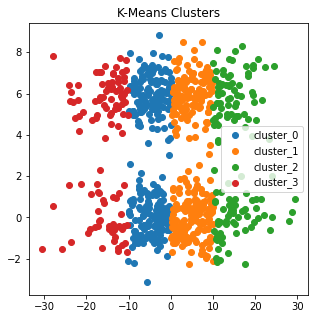

In [91]:
# unscaled viz
plt.figure(figsize=(5, 5))

for cluster_n in df.cluster.sort_values().unique():
    plt.scatter(df[df.cluster == cluster_n].x, df[df.cluster == cluster_n].y, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()